# Ejercicio 4

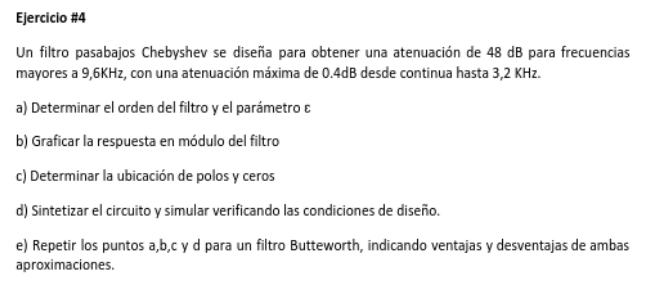

Siendo:

$$
\alpha_{max} = 0,4~dB~~~~~~\alpha_{min} = 48~dB
$$

$$
\omega_p = 6400\pi~~~~~~\omega_s = 19200\pi
$$

Siendo el factor de normalizacion:

$$
\Omega = \frac{1}{\omega_p}~~\to~~\Omega = \frac{1}{6400~\pi}
$$

$$
\Omega_p = 1~~~~~~\Omega_s = 3
$$

### Parte A

Siendo el coeficiente de amortiguamiento al cuadrado:

$$
\xi^2 = 10^{0,1~.~\alpha_{max}} - 1
$$

In [1]:
from math import log, sqrt, ceil

A_MAX = 0.4
EPS_2 = 10 ** (0.1 * A_MAX) - 1

print("El valor de epsilon es: {}".format(sqrt(EPS_2)))

El valor de epsilon es: 0.3106093948083108


Siendo el orden del filtro:

$$
n = \frac{ln(\sqrt{4.\frac{10^{0,1~.~\alpha_{min}} - 1}{\xi^2}})}{ln~(\Omega_s + \sqrt{\Omega^2_s - 1})}
$$

In [2]:
A_MIN = 48
OMEGA_S = 3

n = ceil( log( sqrt( 4 * (10 ** (0.1 * A_MIN) - 1 ) / EPS_2 ) ) / log( OMEGA_S + sqrt(OMEGA_S ** 2 - 1) ))

print("El ordel del filtro es: {}".format(n))

El ordel del filtro es: 5


### Partes B y C

Obteniendo los $C_n(\omega)$:

$$
C_n(\omega) = 2\omega~.~C_{n-1}(\omega) - C_{n-2}(\omega)
$$

Siendo:

$$
C_0 = 1,~~~~C_1 = \omega,~~~~C_2 = 2\omega^2 - 1,~~~~C_3 = 4\omega^3 - 3\omega
$$

$$
C_4 = 8\omega^4 - 8\omega^2 + 1,~~~~C_5 = 16\omega^5 - 20\omega^3 + 5\omega
$$

Siendo:

$$
C^2_5 = 256\omega^{10} - 320\omega^{8} + 80\omega^{6} - 320\omega^{8} + 400\omega^{6} - 100\omega^{4} + 80\omega^{6} - 100\omega^{4} + 25\omega^{2}
$$

$$
C^2_5 = 256\omega^{10} - 640\omega^{8} + 560\omega^{6} - 200\omega^{4} + 25\omega^{2}
$$

Remplazando $\omega$ por $s$:

$$
C^2_5 = -256s^{10} + 640s^{8} - 560s^{6} + 200s^{4} - 25s^{2}
$$

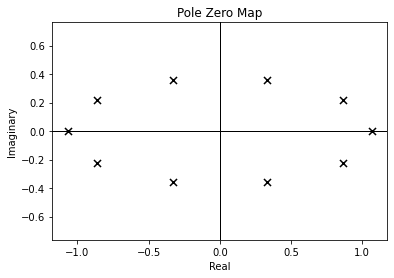

In [5]:
%matplotlib inline
from control import TransferFunction, pzmap, bode

NUM = 1
CN_2 = [-256, 0, 640, 0, -560, 0, 200, 0, -25, 0, 0]
DEN_2 = [i * EPS_2 for i in CN_2]
DEN_2[-1] = 1

TF_2 = TransferFunction(NUM, DEN_2)
pz = pzmap(TF_2)